Import Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

In [3]:
import numpy as np
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

In [4]:
df = df_raw.copy()
df["rssdid"] = df["rssdid"].astype(int)
#df.rssdid.max()
df[["rssdid", "year", "date", "assets"]].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))
#df_raw[(df_raw.rssdid==37.0) & (df_raw.quarter==4)][["year", "tradingassets"]]
df.info()
df.rssdid.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609540 entries, 0 to 1609539
Columns: 167 entries, rssdid to dividendoncommonstock
dtypes: datetime64[ns](1), float64(164), int32(1), object(1)
memory usage: 2.0+ GB


6141       152
112332     152
919755     152
860334     152
731247     152
          ... 
387934       1
1998663      1
4031208      1
1998672      1
313773       1
Name: rssdid, Length: 20650, dtype: int64

In [5]:
df_raw["tradingassets"].describe().apply(lambda x: format(x, 'f'))
banksWithTradingAssets = df_raw[(df_raw.tradingassets!=0) & (df_raw.tradingassets.notnull()) & (df_raw.quarter==4)][["rssdid","year", "tradingassets"]]
uniqueRSSDID = banksWithTradingAssets.rssdid.unique()
banksWithTradingAssets.head(100)

,rssdid,year,tradingassets
645,354.0,1986.0,1893.0
1441,868.0,1985.0,1022.0
4164,2509.0,1984.0,17489.0
4168,2509.0,1985.0,48248.0
4172,2509.0,1986.0,33367.0
4176,2509.0,1987.0,24896.0
4180,2509.0,1988.0,9895.0
4184,2509.0,1989.0,202745.0
5638,3533.0,1984.0,9225.0
5642,3533.0,1985.0,7872.0


In [6]:
temp_df= df_raw[(df_raw.rssdid==12311.0) & (df_raw.tradingassets!=0) & (df_raw.tradingassets.notnull()) & ((df_raw.quarter==4))]
#print(temp_df)
first_row = temp_df[temp_df.year==2010]
print("Sum: ",first_row.assets)
#print("Single",first_row.liabilities)
sum = first_row.equity + first_row.liabilities
print("Difference", sum)
for (columnName, columnData) in first_row.iteritems():
    if(columnData.iloc[0]==597539.0):
        print("///////",columnName)

Sum:  19086    53407269.0
Name: assets, dtype: float64
Difference 19086    52809730.0
dtype: float64


In [7]:
df_raw[(df_raw.rssdid==3850.0) & (df_raw.tradingassets!=0) & (df_raw.tradingassets.notnull())]

,rssdid,chartertype,cert,bhcid,date,name,assets,reloans,cash,persloans,agloans,subordinateddebt,equity,demanddep,transdep,brokereddep,timedepge100k,timedeple100k,ciloans,loans,loansnet,fedfundsrepoasset,tradingassets,securities,securities_ammcost,securitiesheldtomaturity,securitiesavailableforsale,liabilities,deposits,foreigndep,nonintbeardep,intbeardep,intbearfordep,fedfundsrepoliab,tradingliabilities,otherborrowedmoney,timesavdep,nontransdep,timedep,timedepuninsured,savdep,totsavdep,numemployees,intexpdep,qavgbaldue,qavgtreasuriesagencydebt,qavgmbs,qavgothersecurities,qavgtradingassets,qavgfedfundsrepoasset,qavgloans,qavgreloans1to4fam,qavgreloansother,qavgagloans,qavgciloans,qavgpersccards,qavgpersother,qavgforloans,qavgleases,qavgassets,qavgtransdep,qavgsavdep,qavgtimedepge100k,qavgtimedeple100k,qavgfordep,qavgfedfundsrepoliab,qavgtradingandotherborrowed,intexptradingandotherborrowed,qavgpersloans,qavgreloans,qavgsecurities,securities_less_3m,securities_3m_1y,securities_1y_3y,securities_3y_5y,securities_5y_15y,securities_over_15y,securitiestreasury_less_3m,securitiestreasury_3m_1y,securitiestreasury_1y_3y,securitiestreasury_3y_5y,securitiestreasury_5y_15y,securitiestreasury_over_15y,securitiesrmbs_less_3m,securitiesrmbs_3m_1y,securitiesrmbs_1y_3y,securitiesrmbs_3y_5y,securitiesrmbs_5y_15y,securitiesrmbs_over_15y,securitiesothermbs_less_3y,securitiesothermbs_over_3y,loansleases_mat_less_1y,securities_mat_less_1y,resloans_less_3m,resloans_3m_1y,resloans_1y_3y,resloans_3y_5y,resloans_5y_15y,resloans_over_15y,loansleases_less_3m,loansleases_3m_1y,loansleases_1y_3y,loansleases_3y_5y,loansleases_5y_15y,loansleases_over_15y,timedeple100k_less_3m,timedeple100k_3m_1y,timedeple100k_1y_3y,timedeple100k_over_3y,timedeple100k_less_1y,timedepge100k_less_3m,timedepge100k_3m_1y,timedepge100k_1y_3y,timedepge100k_over_3y,interestratederivatives,interestratederivatives_par,grosshedging,fixedrateswaps,totalswaps,floatingrateswaps,nethedging,grosstrading,year,month,quarter,day,dateq,operinc,intexp,intincnet,nonintinc,domdepservicecharges,nonintexp,intandnonintexp,salaries,intexpalldep,intexpdomdep,intexpsubordinated,exponpremises,intanddivincsecurities,loanleaselossprovision,netinc,intexptimedepge100k,intexptimedeple100k,tradingrevenue,intincbaldue,intinctreasuriesagencydebt,intincmbs,intincothersecurities,intincfedfundsrepoasset,intincloans,intincreloans1to4fam,intincreloansother,intincagloans,intincciloans,intincpersccards,intincpersother,intincforloans,intincleases,intincassets,intexptransdep,intexpsavdep,intexpfordep,intexpfedfundsrepoliab,intincpersloans,intincreloans,dividendoncommonstock
6003,3850.0,200.0,13702.0,1100327.0,19840331.0,FIRST CITY NB OF HOUSTON,8831310.0,1056636.0,1182832.0,522733.0,201.0,50000.0,407363.0,1311470.0,1437358.0,1026685.0,2874032.0,186920.0,3603738.0,6189612.0,6031322.0,85783.0,18268.0,919345.0,NaN,NaN,NaN,8423947.0,4738413.0,1453193.0,1311470.0,3426943.0,1448576.0,1633043.0,NaN,84520.0,3301055.0,3301055.0,3060952.0,2874032.0,240103.0,240103.0,2630.0,106552.0,711304.0,NaN,NaN,NaN,23688.0,90712.0,5836335.0,NaN,NaN,224.0,3389657.0,NaN,NaN,248768.0,NaN,8954936.0,NaN,NaN,2508296.0,NaN,1311208.0,2268510.0,82117.0,4802.0,NaN,1012239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984.0,3.0,1.0,31.0,1984-03-31,228303.0,168506.0,43358.0,16439.0,1182.0,41296.0,209802.0,21178.0,106552.0,74188.0,1667.0,5033.0,17697.0,17500.0,7467.0,60518.0,NaN,NaN,18492.0,NaN,NaN,NaN,2212.0,172068.0,NaN,NaN,5.0,96479.0,NaN,NaN,6969.0,853.0,211864.0,NaN,NaN,32364.0,55445.0,NaN,28858.0,0.0
6004,3850.0,200.0,13702.0,1100327.0,19840630.0,FIRST CITY NB OF HOUSTON,9032608.0,1118418.0,1248007.0,551024.0,738.0,50000.0,419908.0,1274414.0,1393660.0,911269.0,2785601.0,194170.0,3519241.0,6246331.0,6106336.0,191706.0,6356.0,884692.0,NaN,NaN,NaN,8612700.0,4620435.0,1129464.0,1274414.0,334602

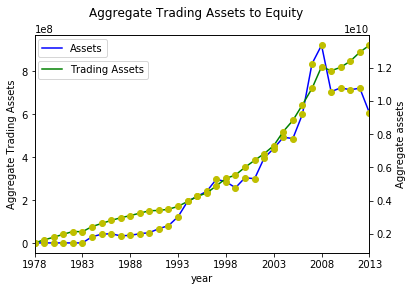

In [8]:
df_allyears = df_raw.loc[df["quarter"]==4]
year = 1978
arrayAggTradingAssets = []
arrayAggAssets = []

for i in range(36):
    temp_df = df_allyears.copy()
    temp_df = temp_df[(temp_df["year"]==year)]
    sumTradingAssets = temp_df.tradingassets.sum()
    sumAssets = temp_df.qavgassets.sum()
    arrayAggTradingAssets.append(sumTradingAssets)
    arrayAggAssets.append(sumAssets)
    year = year + 1

#print(arrayAggEquity)
#print(arrayAggAssets)
years = [str(year) for year in range(1978, 2014)]
d1 = {"TradingAssets" : arrayAggTradingAssets, "Assets": arrayAggAssets}
temp_df = pd.DataFrame(data=d1, index=years)
fig, ax = plt.subplots()
fig.suptitle("Aggregate Trading Assets to Equity")
ax.set_ylabel("Aggregate Trading Assets")
ax.set_xlabel("year")
ax2 = ax.twinx()
ax2.set_ylabel("Aggregate assets")
line1 = temp_df.TradingAssets.plot(ax=ax, style="b-")
line1 = temp_df.TradingAssets.plot(ax=ax, style="oy")
line2 = temp_df.Assets.plot(ax=ax2, style="g-")
line2 = temp_df.Assets.plot(ax=ax2, style="oy")
#ax.set_xticklabels(temp_df.index, rotation=60)
ax.legend(["Assets"])
ax2.legend(["Trading Assets"])
ax.legend(["Assets"], loc=(0.01, 0.9))
ax2.legend(["Trading Assets"], ncol=2 ,loc=(0.01, 0.8))

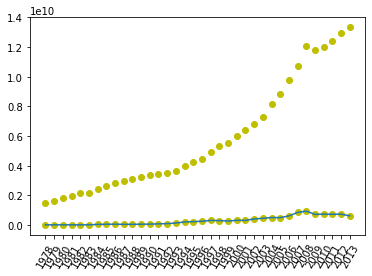

In [9]:
fig, ax = plt.subplots()
ax.set_xticklabels(temp_df.index, rotation=60)
ax.plot(temp_df.TradingAssets, "oy", temp_df.TradingAssets, "" ,  temp_df.Assets, "oy")

<BarContainer object of 36 artists>

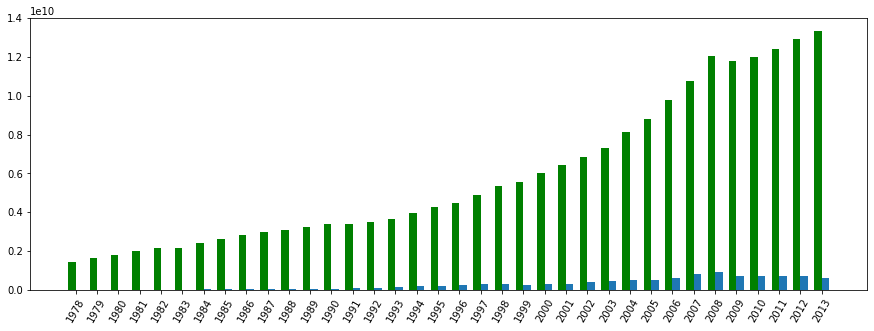

In [10]:
x = np.arange(len(temp_df.index))
width = 0.35
#temp_df.TradingAssets = temp_df.TradingAssets/10
fig, ax = plt.subplots(figsize=(15,5))
#ax2 = ax.twinx()
ax.set_xticks(x)
ax.set_xticklabels(temp_df.index, rotation=60)
ax.bar(x - width/2, temp_df.Assets, width, label='Assets', color="g")
ax.bar(x + width/2, temp_df.TradingAssets, width, label="Trading Assets")

Ratio of trading assets towards assets. It has risen over time. The share of trading assets has risen.Glass-Steagal Act im Jahre 1999 aufgehoben.

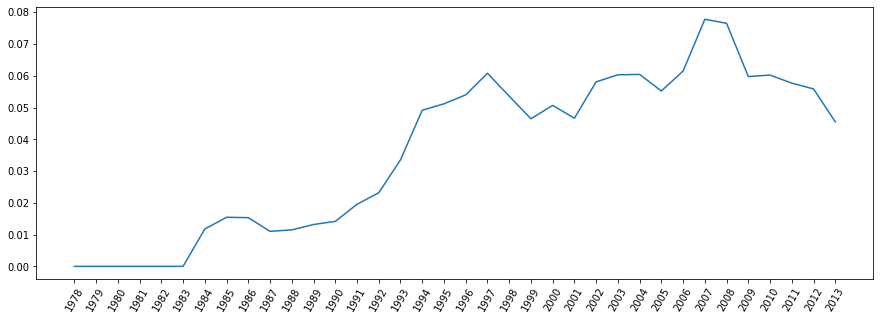

In [11]:
temp_df["Difference"] = temp_df.Assets-temp_df.TradingAssets
temp_df["Ratio"] = temp_df.TradingAssets/temp_df.Assets
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xticklabels(temp_df.index, rotation=60)
ax.plot(temp_df.Ratio)
#print(type(temp_df))

In [12]:
from datetime import date
x = date(2019, 12, 24)
print(x.weekday())

1
